<a href="https://colab.research.google.com/github/kongqiahaha/python-/blob/master/%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E7%9A%84%E5%BA%94%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys 
sys.path.insert(0,"./drive/My Drive/data/卷积神经网络的实现及应用")

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

np.random.seed(1)

In [0]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 2


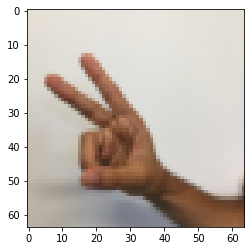

In [6]:
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [7]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [0]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
  X=tf.placeholder(shape=[None,n_H0,n_W0,n_C0],dtype=tf.float32)
  Y=tf.placeholder(shape=[None,n_y],dtype=tf.float32)

  return X,Y


In [9]:
X, Y = create_placeholders(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)


In [0]:
def initialize_parameters():
  tf.set_random_seed(1) 
  W1=tf.get_variable("W1",[4,4,3,8],initializer=tf.contrib.layers.xavier_initializer(seed=0))
  W2=tf.get_variable("W2",[2,2,8,16],initializer=tf.contrib.layers.xavier_initializer(seed=0))
  parameters = {"W1":W1,"W2":W2}
  return parameters

In [15]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1,1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))

W1 = [-0.0752826   0.08046506 -0.18115364  0.01793462 -0.11417466 -0.15131985
 -0.1336818  -0.06460937]
W2 = [ 0.18771225  0.02089775  0.00491112 -0.12298661 -0.04200333  0.13979024
  0.05375856 -0.10530782 -0.15856427  0.19796973  0.04295498 -0.0471608
  0.01342118  0.21189791  0.1855194  -0.13519925]


In [0]:
def forward_propagation(X, parameters):
  W1=parameters["W1"]
  W2=parameters["W2"]
  Z1=tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding="SAME")
  A1=tf.nn.relu(Z1)
  P1=tf.nn.max_pool(A1,[1,8,8,1],strides=[1,8,8,1],padding="SAME")
  Z2=tf.nn.conv2d(P1,W2,strides=[1,1,1,1],padding="SAME")
  A2=tf.nn.relu(Z2)
  P2=tf.nn.max_pool(A2,[1,4,4,1],strides=[1,4,4,1],padding="SAME")
  P2 = tf.contrib.layers.flatten(P2)
  Z3 = tf.contrib.layers.fully_connected(P2, num_outputs = 6, activation_fn=None)
  return Z3

In [32]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
    print("Z3 = " + str(a))

Z3 = [[ 1.4416982  -0.24909668  5.4504995  -0.2618962  -0.20669872  1.3654671 ]
 [ 1.4070847  -0.02573182  5.08928    -0.4866991  -0.4094069   1.2624853 ]]


In [0]:
def compute_cost(Z3, Y):
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels=Y))
  return cost

In [34]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4,64,64,3), Y: np.random.randn(4,6)})
    print("cost = " + str(a))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = 4.6648703


In [0]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs = 100, minibatch_size = 64, print_cost = True):
  ops.reset_default_graph()
  tf.set_random_seed(1)
  seed = 3
  (m, n_H0, n_W0, n_C0) = X_train.shape
  n_y = Y_train.shape[1]
  costs = []
  X,Y=create_placeholders(n_H0,n_W0,n_C0,n_y)

  parameters=initialize_parameters()
  Z3=forward_propagation(X,parameters)
  cost=compute_cost(Z3,Y)
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

  init = tf.global_variables_initializer()
  with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
      minibatch_cost=0
      num_minibatches=int(m/minibatch_size)
      seed = seed + 1
      minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
      for minibatch in minibatches:
        minibatch_X,minibatch_Y=minibatch
        _,temp_cost=sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
        minibatch_cost += temp_cost/num_minibatches
      if print_cost == True and epoch % 5 == 0:
        print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
      if print_cost == True and epoch % 1 == 0:
        costs.append(minibatch_cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

  return train_accuracy, test_accuracy, parameters


Cost after epoch 0: 1.921332
Cost after epoch 5: 1.904156
Cost after epoch 10: 1.904309
Cost after epoch 15: 1.904477
Cost after epoch 20: 1.901869
Cost after epoch 25: 1.740181
Cost after epoch 30: 1.664650
Cost after epoch 35: 1.626261
Cost after epoch 40: 1.620045
Cost after epoch 45: 1.580173
Cost after epoch 50: 1.550707
Cost after epoch 55: 1.486015
Cost after epoch 60: 1.373514
Cost after epoch 65: 1.266907
Cost after epoch 70: 1.180652
Cost after epoch 75: 1.141219
Cost after epoch 80: 1.072382
Cost after epoch 85: 1.064842
Cost after epoch 90: 1.018332
Cost after epoch 95: 0.989791


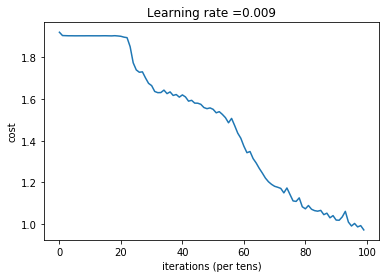

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.6657407
Test Accuracy: 0.525


In [43]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)